# Problem Set 3, due February 10 at 11:59am (i.e., noon).

###Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Parts 1 and 2 will be relatively easy; Part 3 will take more time.

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours trying to make various versions import for grading.

In [476]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
import math
from sklearn.cross_validation import train_test_split
from random import randrange

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [477]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [478]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)
# uncomment the following if you want to see a lengthy description of the dataset
print(bdata.DESCR)

dict_keys(['DESCR', 'target', 'data', 'feature_names'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD 

---

##Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  If you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning (for instance, [this one](https://github.com/jrjohansson/scientific-python-lectures)).

###1.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


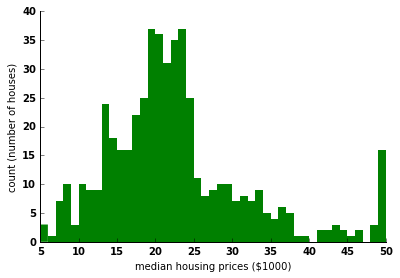

In [ ]:
# prepare IPython to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  

# edit the code below to make the graph look good
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.hist(bdata.target, bins = (max(bdata.target)-min(bdata.target)), facecolor='green', edgecolor = "none")
ax.set_xlabel('median housing prices ($1000)')
ax.set_ylabel('count (number of houses)')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(axis='x', top='off')     
ax.tick_params(axis='y', right='off')

###1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


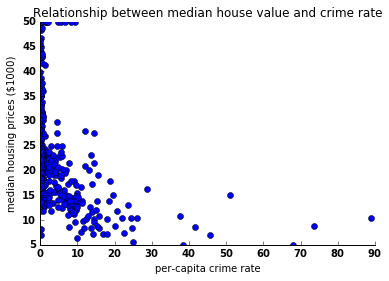

In [ ]:
# enter your code below
plt.plot(bdata.data[:, [0]], bdata.target, "o")
plt.ylabel('median housing prices ($1000)')
plt.xlabel('per-capita crime rate')
plt.title('Relationship between median house value and crime rate')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='x', top='off')     
plt.tick_params(axis='y', right='off')

###1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

In [ ]:
# enter your code here
data = np.append(bdata.data[:, [3]], bdata.target[:, None], axis=1)
plt.boxplot(data)
plt.ylabel("Median house values in $1000's")
plt.xlabel('Charles River dummy variable (= 1 if tract bounds river; 2 otherwise)')
plt.title('Relationship between median house value and proximity to the river')

There isn't enough data points for river-bound houses, but my intuition is that those houses will have a higher median value comparing to houses that aren't close to the river.

---

##Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

###2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation)



In [ ]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.08
"""
def compute_rmse(predictions, yvalues):
    rmse = 0
    for i in range(len(predictions)):
        tmp = pow((predictions[i] - yvalues[i]),2)
        rmse = rmse + tmp
    rmse = math.sqrt(rmse/len(predictions))
    return rmse

print(compute_rmse((2,2,3),(0,2,6)))

###2.2 Divide your data into training and testing datasets

Randomly select 66% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 34% in a testing dataset (call this "bdata_test")


In [ ]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)
# enter your code here
from sklearn.cross_validation import train_test_split
bdata_train, bdata_test, y_train, y_test = train_test_split(bdata.data, bdata.target, test_size=0.34, random_state=200)

###2.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [ ]:
#RMSE for training set
train_pred = np.empty(shape = (333,))
train_pred.fill(np.nan)
i = 0
for lineindex in range(len(bdata_train)):
        srtd = sorted(bdata_train[lineindex])

        mid_upper = (len(bdata_train[lineindex]))/2
        mid_lower = (len(bdata_train[lineindex])+1)/2
        if len(bdata_train[lineindex])%2 == 0:
            med = (srtd[mid_lower] + srtd[mid_upper])/2.0
            train_pred[i] = med
        else:
            med = np.median(srtd)  
            train_pred[i] = med
        i+=1
        
print(compute_rmse(train_pred,y_train))

#RMSE for test set
test_pred = np.empty(shape = (173,))
test_pred.fill(np.nan)
j = 0
for lineindex in range(len(bdata_test)):
        srtd = sorted(bdata_test[lineindex])

        mid_upper = (len(bdata_test[lineindex]))/2
        mid_lower = (len(bdata_test[lineindex])+1)/2
        if len(bdata_test[lineindex])%2 == 0:
            med = (srtd[mid_lower] + srtd[mid_upper])/2.0
            test_pred[j] = med
        else:
            med = np.median(srtd)  
            test_pred[j] = med
        j+=1
        
print(compute_rmse(test_pred,y_test))

*Enter your observations here*

The computed RMSEs for training vs. testing datasets are similar (18.38 vs 18.92). This is what I expected because the splitting of the original dataset was indeed random and the resulting datasets are similar, thus the MSREs should be similar. 

---

##Part 3: Nearest Neighbors


###3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm](http://en.wikipedia.org/wiki/Norm_(mathematics) distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).

In [ ]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(6,8),2)
5

"""
def distance(x1, x2, L):
    #your code here
    dist = 0
    for i in range(len(x1)):
        temp = pow(abs(x1[i] - x2[i]), L)
        dist = dist + temp
    dist = pow(dist, 1/L)
    return dist
print (distance((3,4),(6,8),2))

###3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts, for each instance in the testing data (bdata_test), the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

In [ ]:
"""
Function
--------
nneighbor

Given the training set and test set, and L, returns the rmse of the predictions made with 
the nearest neighbor algorithm

Parameters
----------
bdata_train: ndarrays
    predictor variables in the training set

y_train
    outcome/target variable in the training set
    
bdata_test
    predictor variables in the test set
    
y_test
    outcome/target variable in the test set

L: int
    L-norm when computing distances

Returns
-------
rmse : float
    the rmse of the predictions
"""
import time

def nneighbor(bdata_train, y_train, bdata_test, y_test, L):
    start_time = time.time()
    #your code here
    test_pred = []
    for i in range(len(bdata_test)):
        mindis = 9999
        index = 0
        for j in range(len(bdata_train)):
            dis = distance(bdata_test[i], bdata_train[j], L)
            if mindis > dis:
                mindis = dis
                index = j
        test_pred.append(y_train[index])
    
    rmse = compute_rmse(test_pred,y_test)
    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return rmse

nneighbor((bdata_train[:,[0,5]]), y_train, bdata_test[:,[0,5]], y_test, 2)


###3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [ ]:
"""
Function
--------
normalize

Given an array of numbers, return an normalized array of numbers

Parameters
----------
raw_data: array
    an array of numbers to be normalized
    
Returns
-------
normalized_data : array
    the normalized array of numbers
"""
def normalize(raw_data):
    #your code here
    normalized_data = np.empty(shape = np.shape(raw_data))
    normalized_data.fill(np.nan)
    avg = np.mean(raw_data)
    sdev = np.std(raw_data)
    for i in range(len(raw_data)):
        normalized_data[i] = (raw_data[i] - avg)/sdev
    return normalized_data

#your additional code here
bdata_train[:,[0]] = normalize(bdata_train[:,[0]])
bdata_train[:,[5]] = normalize(bdata_train[:,[5]])

bdata_test[:,[0]] = normalize(bdata_test[:,[0]])
bdata_test[:,[5]] = normalize(bdata_test[:,[5]])

nneighbor((bdata_train[:,[0,5]]), y_train, bdata_test[:,[0,5]], y_test, 2)

*enter your observations here*

The RMSE after normalization increased from 7.823 to 9.693. This means that the normalization decreased the predictive propensities of the variables after adjusting for the outliners. 

###3.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

In [ ]:
# enter your code here
print(nneighbor((bdata_train[:,[7,8]]), y_train, bdata_test[:,[7,8]], y_test, 2))
print(nneighbor((bdata_train), y_train, bdata_test, y_test, 2))
print(nneighbor((bdata_train), y_train, bdata_test, y_test, 1))
print(nneighbor((bdata_train[:,[0,7,8]]), y_train, bdata_test[:,[0,7,8]], y_test, 1))
print(nneighbor((bdata_train[:,[0,5,7,8]]), y_train, bdata_test[:,[0,5,7,8]], y_test, 1))


*enter your observations here*

Among the features I have tried, the combination of CRIM (per capita crime rate by town), RM (average number of rooms per dwelling), DIS (distances to employment centres), RAD (accessibility to radial highways) and L1 norm distance function produced the lowest RMSE. 
My decisions did affected the running time of the algorithm. When more features are added, running time gets longer, when L gets smaller, running time gets longer.

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see K-fold [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)).  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations.

In [ ]:
# enter your code here
def cv10 (bdata, y):
    bdata_split = list()
    y_split = list()
    bdata_copy = list(bdata)
    y_copy = list(y)
    N = int(len(bdata)/10)
    for i in range(10):
        fold_x = list()
        fold_y = list()
        while len(fold_x) < N:
            index = randrange(len(bdata_copy))
            fold_x.append(bdata_copy.pop(index))
            fold_y.append(y_copy.pop(index))            
        bdata_split.append(fold_x)
        y_split.append(fold_y)
    return bdata_split, y_split

bdata_cv, y_cv = cv10(bdata.data, bdata.target)

RMSE = 0
for i in range(len(bdata_cv)):
    x_test = np.array(bdata_cv[i])
    y_test = np.array(y_cv[i])
    x_train = bdata_cv[:i] + bdata_cv[i+1 :]
    y_train = y_cv[:i] + y_cv[i+1 :]
    X_train_c = x_train[0]
    Y_train_c = y_train[0]
    for j in range(1,9,1):
        X_train_c = np.concatenate((X_train_c, x_train[j]))
        Y_train_c = np.concatenate((Y_train_c, y_train[j]))
    tmp = nneighbor(X_train_c[:,[0,5]], Y_train_c, x_test[:,[0,5]], y_test, 2)
    RMSE = RMSE + tmp
RMSE = RMSE/10
print(RMSE)

###3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [ ]:
"""
Function
--------
knn

Given the training set and test set, L, and K, returns the rmse of the predictions made with 
the k nearest neighbor algorithm

Parameters
----------
bdata_train: ndarrays
    predictor variables in the training set

y_train
    outcome/target variable in the training set
    
bdata_test
    predictor variables in the test set
    
y_test
    outcome/target variable in the test set

L: int
    L-norm when computing distances

K: int
    number of nearest neighbors

Returns
-------
rmse : float
    the rmse of the predictions
"""
import operator 


def knn(bdata_train, y_train, bdata_test, y_test, L, K):
    start_time = time.time()
    test_pred = []
    for i in range(len(bdata_test)):
        distances = []
        for j in range(len(bdata_train)):
            dis = distance(bdata_test[i], bdata_train[j], L)
            distances.append((y_train[j],dis)) 
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
        for m in range(K):
            neighbors.append(distances[m][0])
        test_pred.append(sum(neighbors) / float(len(neighbors)))
        
    rmse = compute_rmse(test_pred, y_test)
    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return rmse

# enter your additional code here
bdata_train, bdata_test, y_train, y_test = train_test_split(bdata.data, bdata.target, test_size=0.34, random_state=200)
knn((bdata_train[:,[0,5]]), y_train, bdata_test[:,[0,5]], y_test, 2, 3)

###3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?


In [ ]:
# enter your code here
for i in [0,1,5,6,7,9]:
    bdata.data[:,[i]] = normalize(bdata.data[:,[i]])

bdata_cv, y_cv = cv10(bdata.data, bdata.target)
RMSE = 0
rmse = []
start_time = time.time()
for K in range(1,25,1):
    print("When K = ", K)
    for i in range(len(bdata_cv)):
        x_test = np.array(bdata_cv[i])
        y_test = np.array(y_cv[i])
        x_train = bdata_cv[:i] + bdata_cv[i+1 :]
        y_train = y_cv[:i] + y_cv[i+1 :]
        X_train_c = x_train[0]
        Y_train_c = y_train[0]
        for j in range(1,9,1):
            X_train_c = np.concatenate((X_train_c, x_train[j]))
            Y_train_c = np.concatenate((Y_train_c, y_train[j]))
        tmp = knn(X_train_c[:,[0,1,5,6,7,9]], Y_train_c, x_test[:,[0,1,5,6,7,9]], y_test, 2, K)
        RMSE = RMSE + tmp
    RMSE = RMSE/10
    rmse.append(RMSE)
    print("the RMSE = ", RMSE)
print("total time taken: " + str(round(time.time() - start_time,2)) + " seconds")

K = range(1,25,1)
plt.plot(K, rmse, '-')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("Relationship between K and RMSE")

*Enter your observations here*

The RMSE drops dramatically when K ranges from 1 to 4, and increases when K is larger than 6. I think a reasonable choice for K is between 4,5,6. The rmses corresponding to these Ks are pretty similar. When k is 6, rmse is the lowest which is 5.46. when k is 4, rmse = 5.48, when k is 5, rmse = 5.49. I would pick 6, but the other two are not too far away from it either.